<a href="https://colab.research.google.com/github/AleksandraOD/Assignments/blob/main/Aspect_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import json
from collections import Counter
import csv

import matplotlib.pyplot as plt

from collections import defaultdict
import seaborn as sns

from wordcloud import WordCloud


In [11]:
file_path = '/content/drive/MyDrive/MIBA/вкр/aspects_dataset.csv'
data = pd.read_csv(file_path)

In [7]:
with open(file_path, mode='r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    data = [row for row in reader]

In [12]:
data.head()

,app_name,app_id,rating,review_text,processed_review_text,aspect_sentiments
0,cleaner_money_manager,ru.innim.my_finance,5,Literally changed my life. So easy and fun to ...,liter chang life easi fun track financ app ent...,"{'track': ['positive'], 'expens': ['positive']..."
1,cleaner_money_manager,ru.innim.my_finance,4,It seems that the categories are shown in the ...,seem categori shown diagram without appar orde...,"{'diagram': ['positive'], 'order': ['positive'..."
2,cleaner_money_manager,ru.innim.my_finance,4,"This app is versatile, customisable and easy t...",app versatil customis easi use coupl featur wo...,"{'coupl': ['positive'], 'order': ['positive'],..."
3,cleaner_money_manager,ru.innim.my_finance,5,Amazing! I've tried various budget apps and no...,amaz ive tri variou budget app none convinc on...,"{'variou': ['neutral'], 'budget': ['neutral'],..."
4,cleaner_money_manager,ru.innim.my_finance,3,I'm on the fence about this budget app. It has...,im fenc budget app realli nice pro enjoy con p...,"{'enjoy': ['positive'], 'sync': ['positive'], ..."


In [23]:
selected_columns = ['app_name', 'aspect_sentiments']
df = data[selected_columns]

In [47]:
df['aspect_sentiments'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2980 entries, 0 to 2979
Series name: aspect_sentiments
Non-Null Count  Dtype 
--------------  ----- 
2980 non-null   object
dtypes: object(1)
memory usage: 23.4+ KB


In [27]:
df['aspect_sentiments'] = df['aspect_sentiments'].apply(lambda x: json.loads(x.replace("'", "\"")))

<ipython-input-27-d38e80f33cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aspect_sentiments'] = df['aspect_sentiments'].apply(lambda x: json.loads(x.replace("'", "\"")))


In [25]:
def count_aspects(aspects_list):
    aspects_counter = Counter()
    for aspects in aspects_list:
        for aspect in aspects.keys():
            aspects_counter[aspect] += 1
    return dict(aspects_counter)

In [29]:
grouped = df.groupby('app_name')['aspect_sentiments'].apply(list)
aspect_counts = grouped.apply(count_aspects)

In [31]:
aspect_counts

app_name
cleaner_money_manager      {'track': 55, 'expens': 132, 'month': 47, 'sho...
horoscope_money_manager    {'app': 116, 'month': 10, 'pleaseeeee': 1, 'th...
my_money                   {'user': 27, 'friendli': 10, 'app': 112, 'expe...
real_byte_money_manager    {'use': 67, 'easi': 23, 'year': 42, 'app': 164...
spendee                    {'expens': 43, 'period': 7, 'year': 51, 'app':...
wallet                     {'app': 136, 'data': 18, 'lot': 8, 'option': 2...
Name: aspect_sentiments, dtype: object

In [30]:
aspect_counts_df = pd.DataFrame.from_dict(aspect_counts, orient='index').fillna(0).astype(int)

TypeError: 'numpy.ndarray' object is not callable

In [32]:
aspects_df = aspect_counts.apply(pd.Series)

In [33]:
aspects_df = aspects_df.reset_index()

In [34]:
aspects_df

,app_name,track,expens,month,shock,credit,card,easili,budget,goal,...,problema,conta,vgood,enteri,acc,disadvantag,troubleshoot,furthermor,stare,freelik
0,cleaner_money_manager,55.0,132.0,47.0,1.0,12.0,14.0,15.0,68.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,horoscope_money_manager,29.0,49.0,10.0,NaN,NaN,1.0,2.0,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,my_money,55.0,84.0,12.0,NaN,2.0,3.0,3.0,23.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,real_byte_money_manager,29.0,74.0,25.0,1.0,7.0,10.0,5.0,27.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,spendee,20.0,43.0,38.0,NaN,3.0,5.0,2.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,wallet,42.0,60.0,22.0,NaN,9.0,13.0,3.0,30.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [39]:
aspects_df.set_index('app_name', inplace=True)

In [40]:
aspects_df = aspects_df.fillna(0).astype(int)

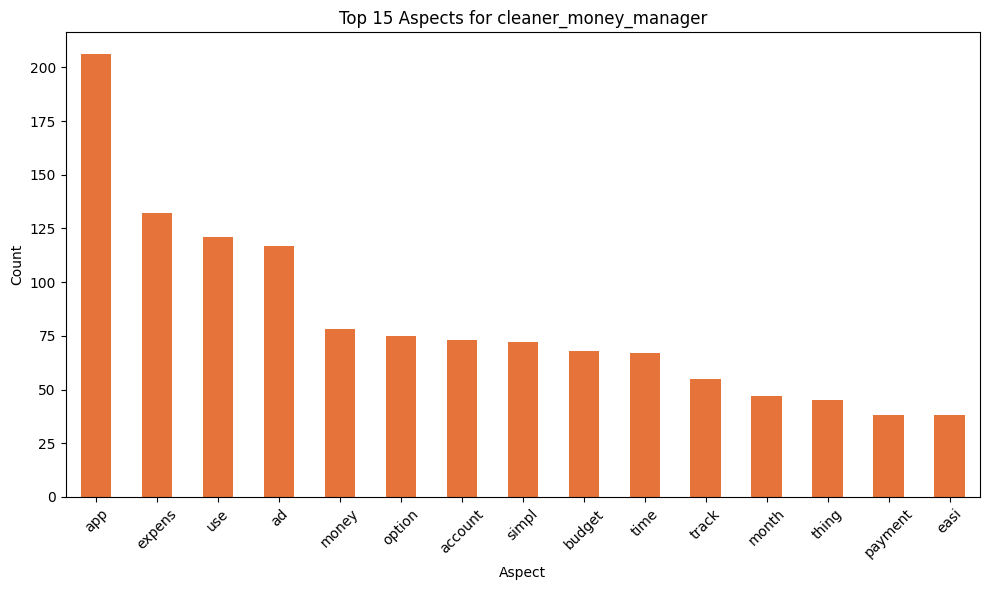

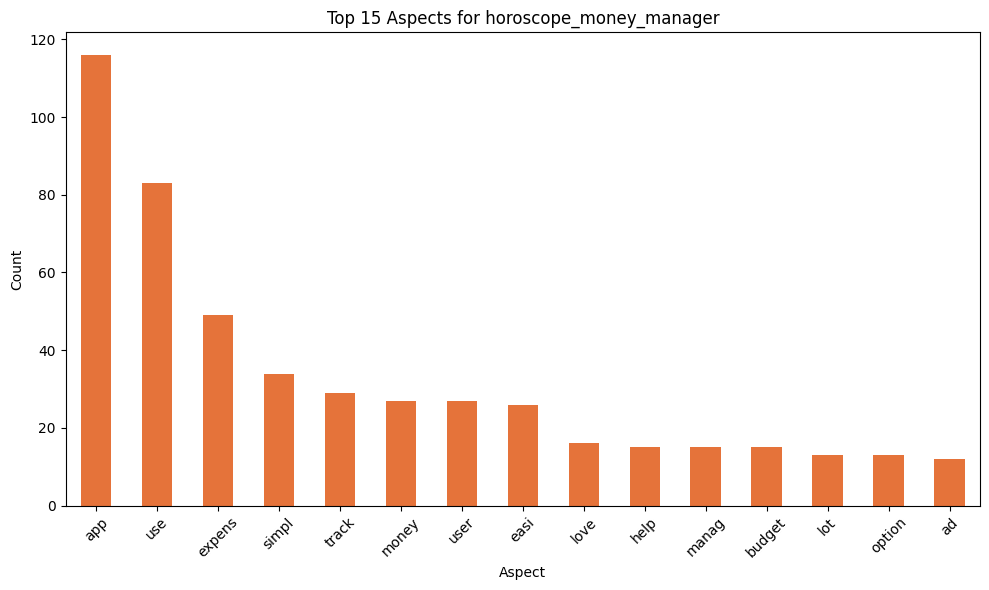

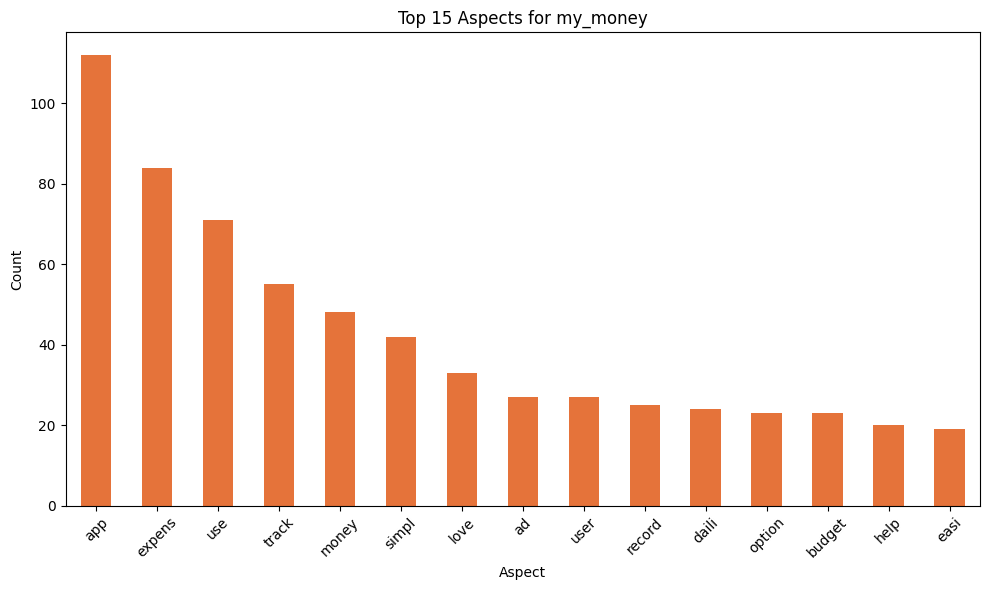

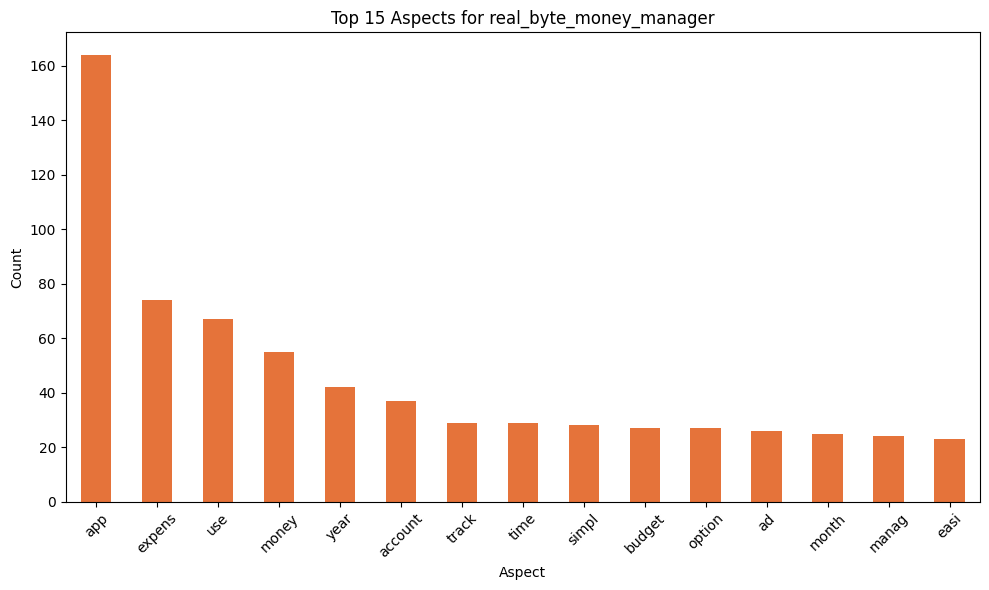

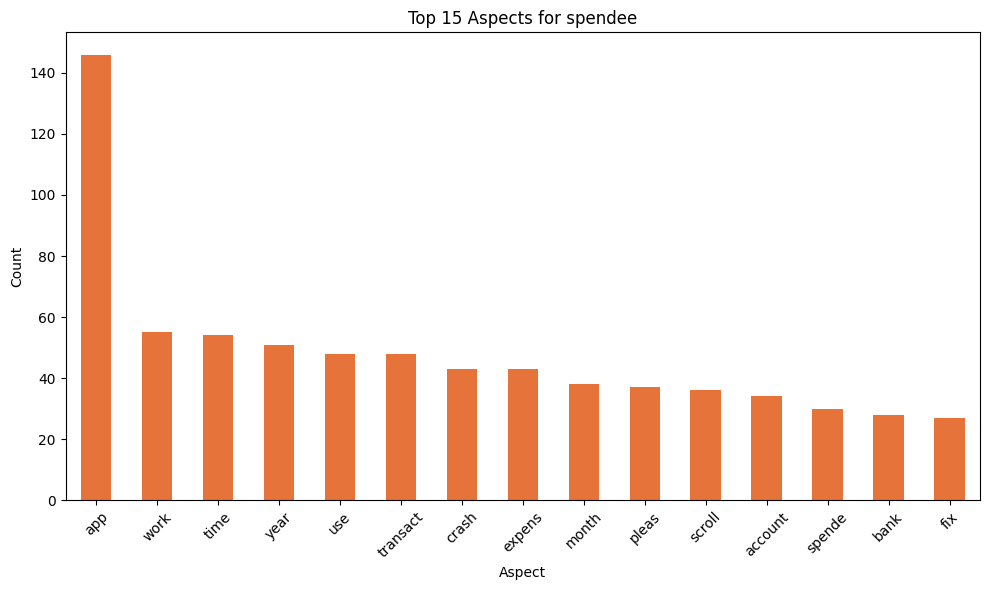

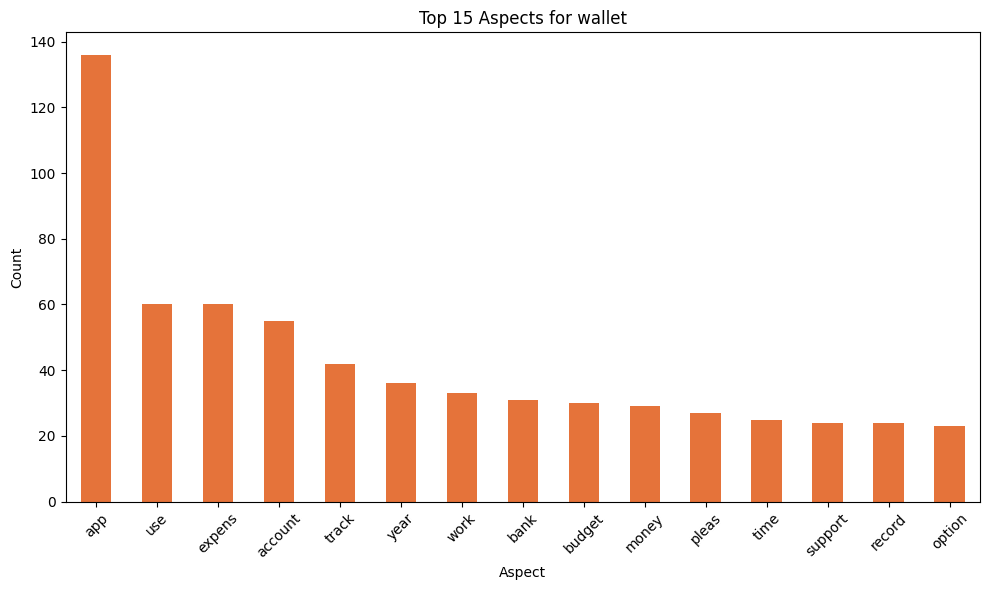

In [44]:
plot_color = "#E5733A"

# Plotting the top 5 aspects for each app
for app in aspects_df.index:
    top_aspects = aspects_df.loc[app].sort_values(ascending=False).head(15)
    plt.figure(figsize=(10, 6))
    top_aspects.plot(kind='bar', color=plot_color)
    plt.title(f'Top 15 Aspects for {app}')
    plt.xlabel('Aspect')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
    plt.show()

In [45]:
sentiment_counts_df = pd.DataFrame(columns=['app_name', 'positive', 'negative', 'neutral'])

In [50]:
sentiment_sums = {'app_name': [], 'positive': [], 'negative': [], 'neutral': []}


In [51]:
def count_sentiments(aspect_sentiment_dicts):
    sentiment_counter = Counter()
    for aspect_sentiments in aspect_sentiment_dicts:
        for sentiment_list in aspect_sentiments.values():
            sentiment_counter.update(sentiment_list)
    return sentiment_counter

In [52]:
for app_name, group in df.groupby('app_name'):
    sentiments = count_sentiments(group['aspect_sentiments'].tolist())
    sentiment_sums['app_name'].append(app_name)
    sentiment_sums['positive'].append(sentiments.get('positive', 0))
    sentiment_sums['negative'].append(sentiments.get('negative', 0))
    sentiment_sums['neutral'].append(sentiments.get('neutral', 0))

In [53]:
sentiment_counts_df = pd.DataFrame(sentiment_sums)

In [54]:
sentiment_counts_df

,app_name,positive,negative,neutral
0,cleaner_money_manager,4127,378,340
1,horoscope_money_manager,830,56,231
2,my_money,1141,22,272
3,real_byte_money_manager,1677,144,360
4,spendee,1361,725,407
5,wallet,1494,383,455


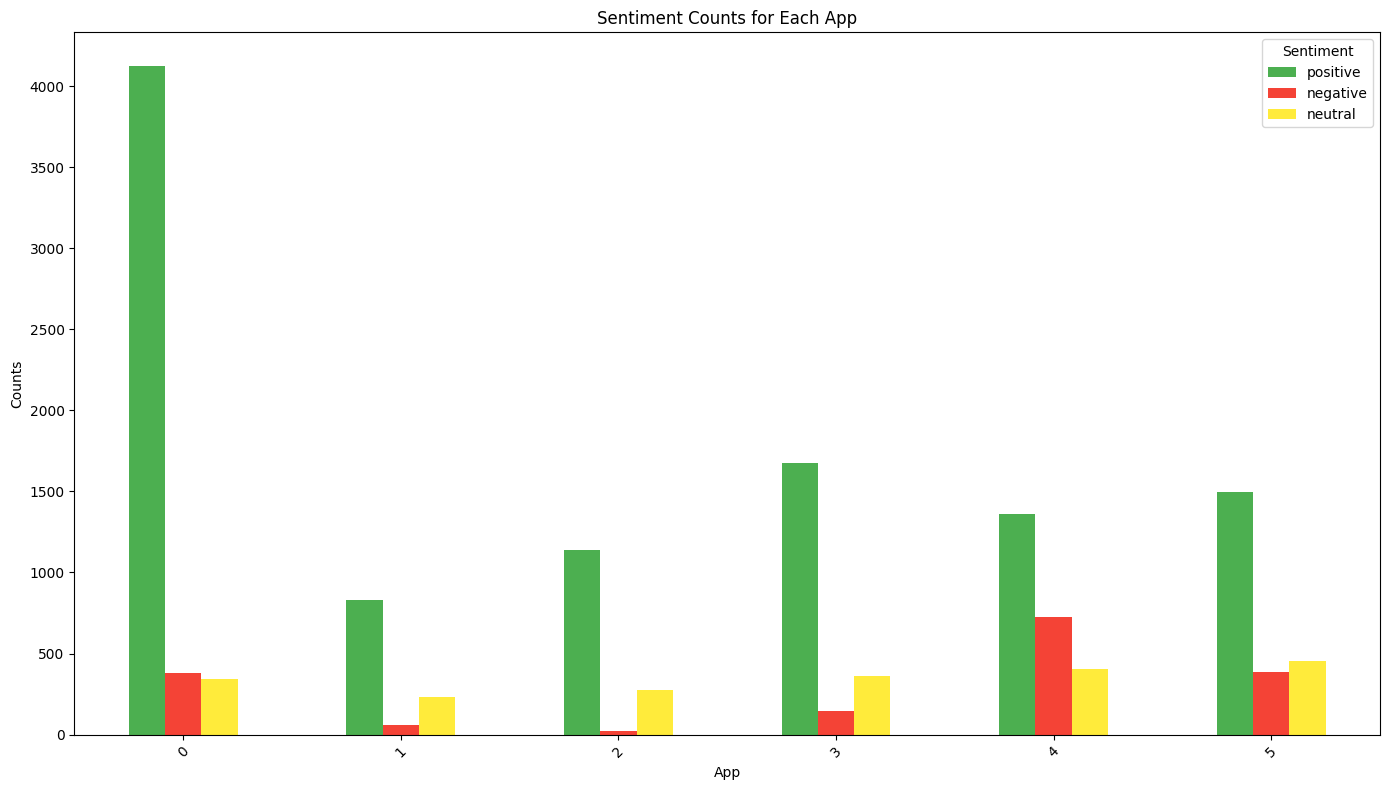

In [55]:
ax = sentiment_counts_df.plot(kind='bar', stacked=False, figsize=(14, 8),
                              color={'positive': '#4caf50', 'negative': '#f44336', 'neutral': '#ffeb3b'})

plt.title('Sentiment Counts for Each App')
plt.xlabel('App')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

# Display the plot
plt.tight_layout()
plt.show()

In [58]:
aspect_sentiment_counts = defaultdict(lambda: defaultdict(Counter))

In [59]:
for _, row in df.iterrows():
    app_name = row['app_name']
    for aspect, sentiments in row['aspect_sentiments'].items():
        aspect_sentiment_counts[app_name][aspect].update(sentiments)

In [60]:
data_for_df = []
for app_name, aspects in aspect_sentiment_counts.items():
    for aspect, sentiments in aspects.items():
        data_for_df.append([app_name, aspect, sentiments['positive'], sentiments['neutral'], sentiments['negative']])

In [61]:
sentiment_summary_df = pd.DataFrame(data_for_df, columns=['app_name', 'aspect', 'positive', 'neutral', 'negative'])

In [62]:
sentiment_summary_df

,app_name,aspect,positive,neutral,negative
0,cleaner_money_manager,track,56,1,1
1,cleaner_money_manager,expens,155,7,6
2,cleaner_money_manager,month,57,3,3
3,cleaner_money_manager,shock,1,0,0
4,cleaner_money_manager,credit,22,0,0
...,...,...,...,...,...
3388,my_money,collect,1,0,0
3389,my_money,logo,1,0,0
3390,my_money,loveeee,1,0,0
3391,my_money,man,1,0,0


In [67]:
def plot_top_aspects_for_app(df, app_name, sentiment, ax):
    # Filter for the app and sentiment
    app_df = df[df['app_name'] == app_name]

    # Get the top 10 aspects for the sentiment
    top_aspects = app_df.nlargest(10, sentiment)

    # Plot
    sns.barplot(x=sentiment, y='aspect', data=top_aspects, ax=ax, color=sentiment_colors[sentiment])
    ax.set_title(f'Top 10 {sentiment} aspects for {app_name}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Aspect')

In [68]:
sentiment_colors = {
    'positive': 'green',
    'neutral': 'gray',
    'negative': 'red'
}

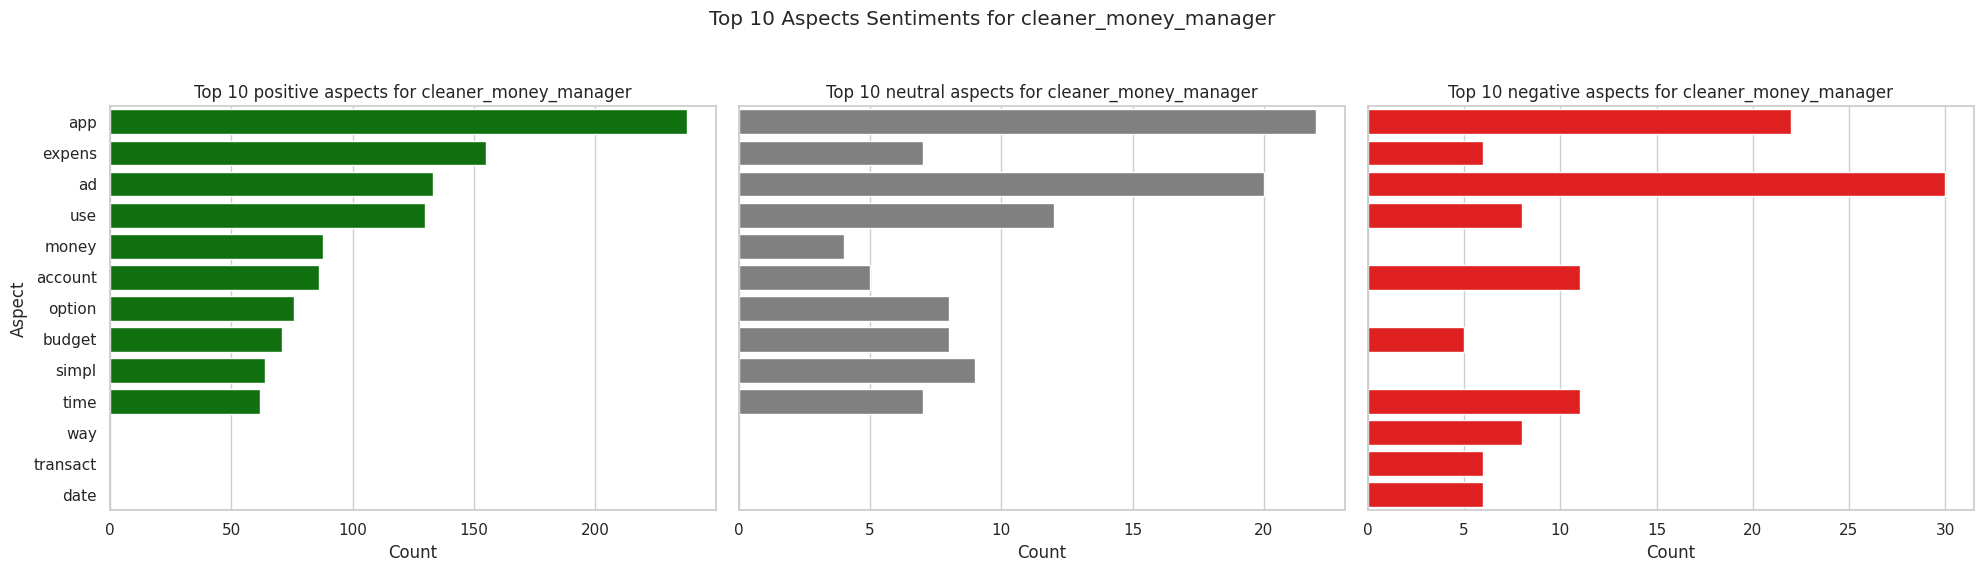

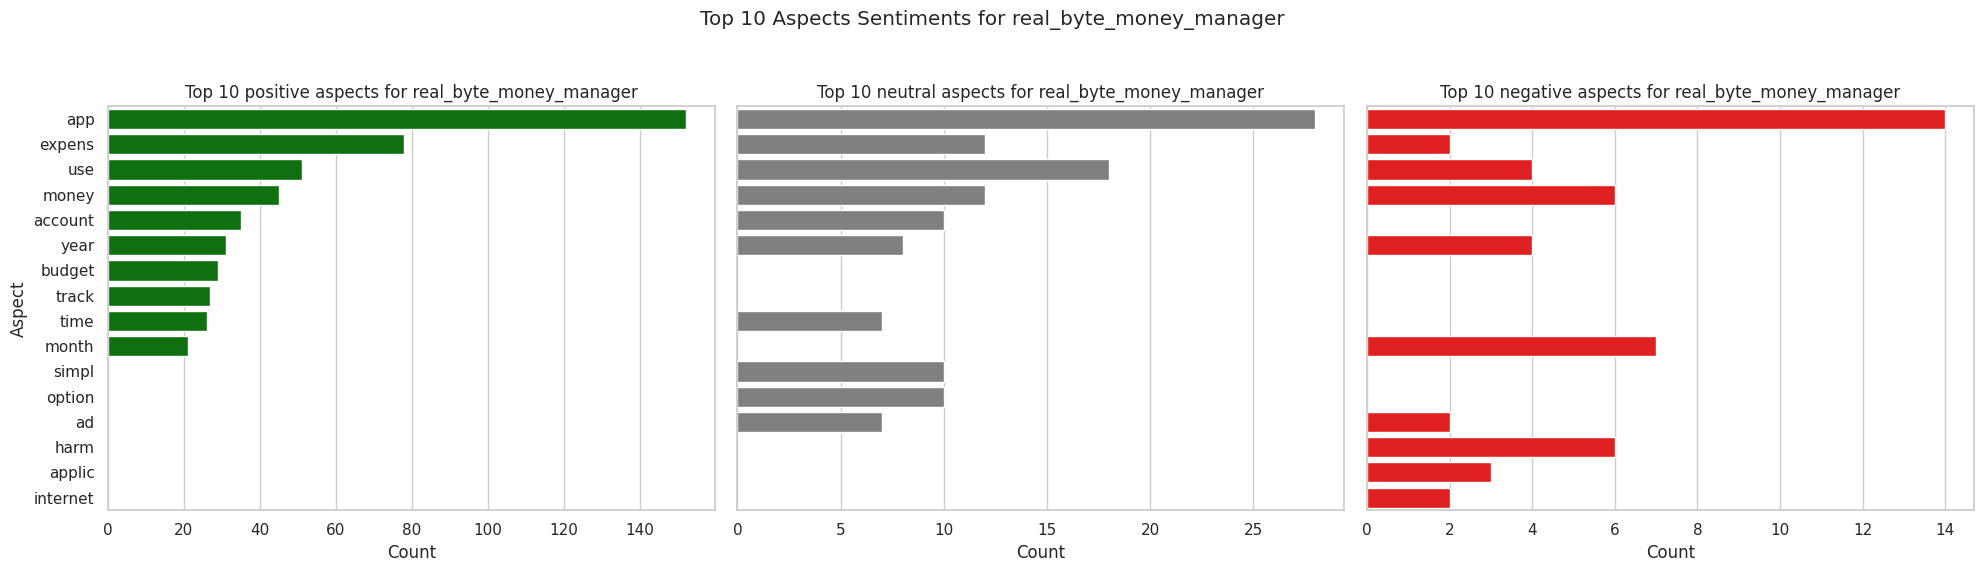

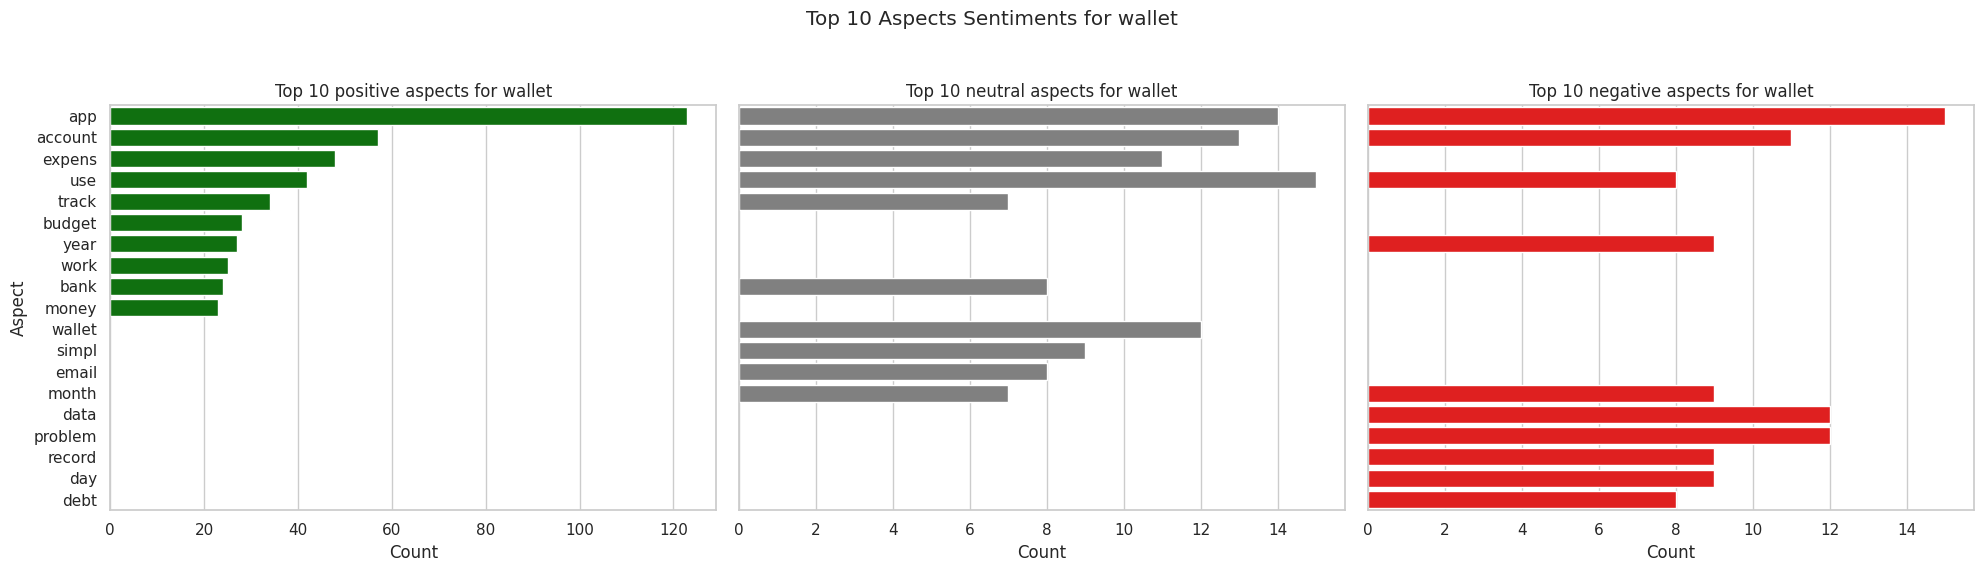

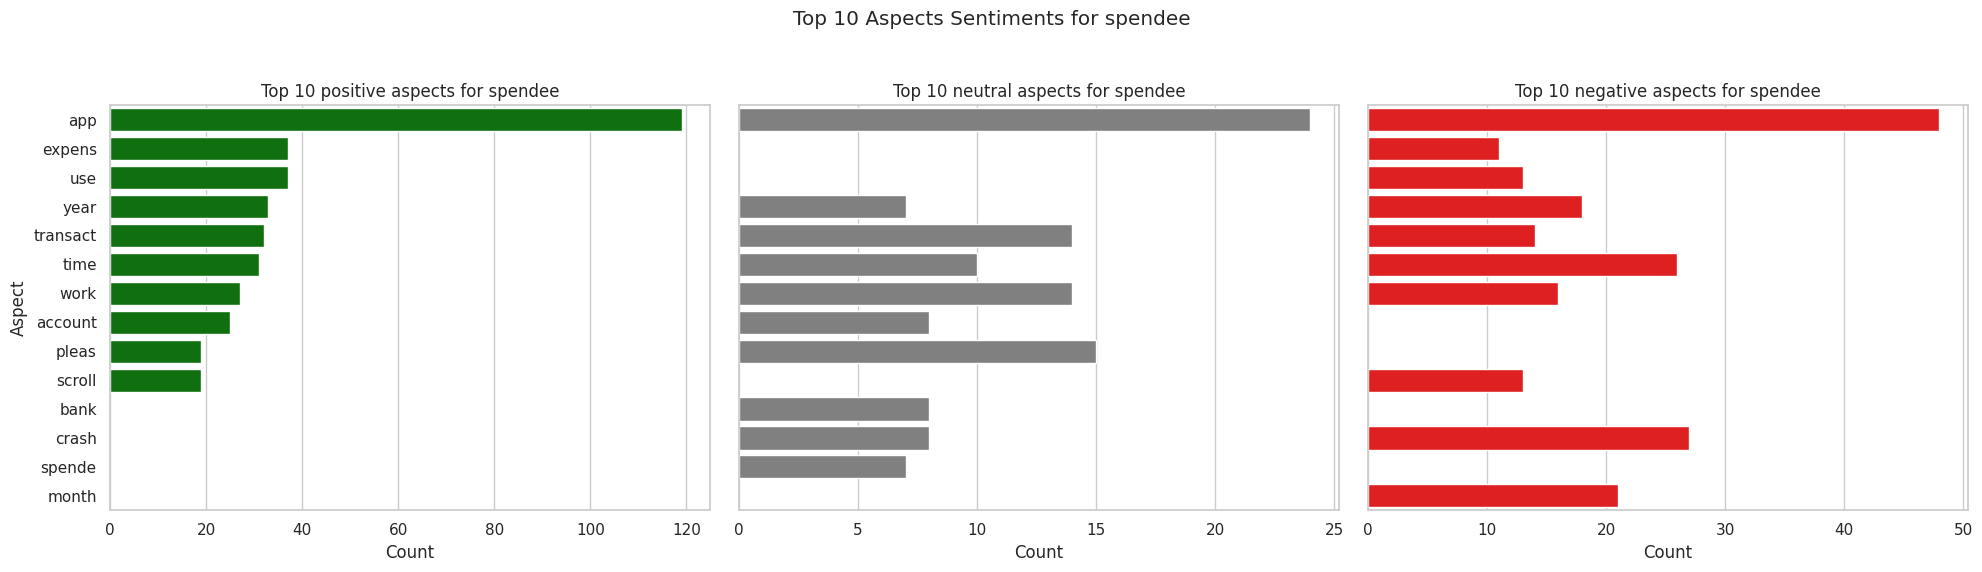

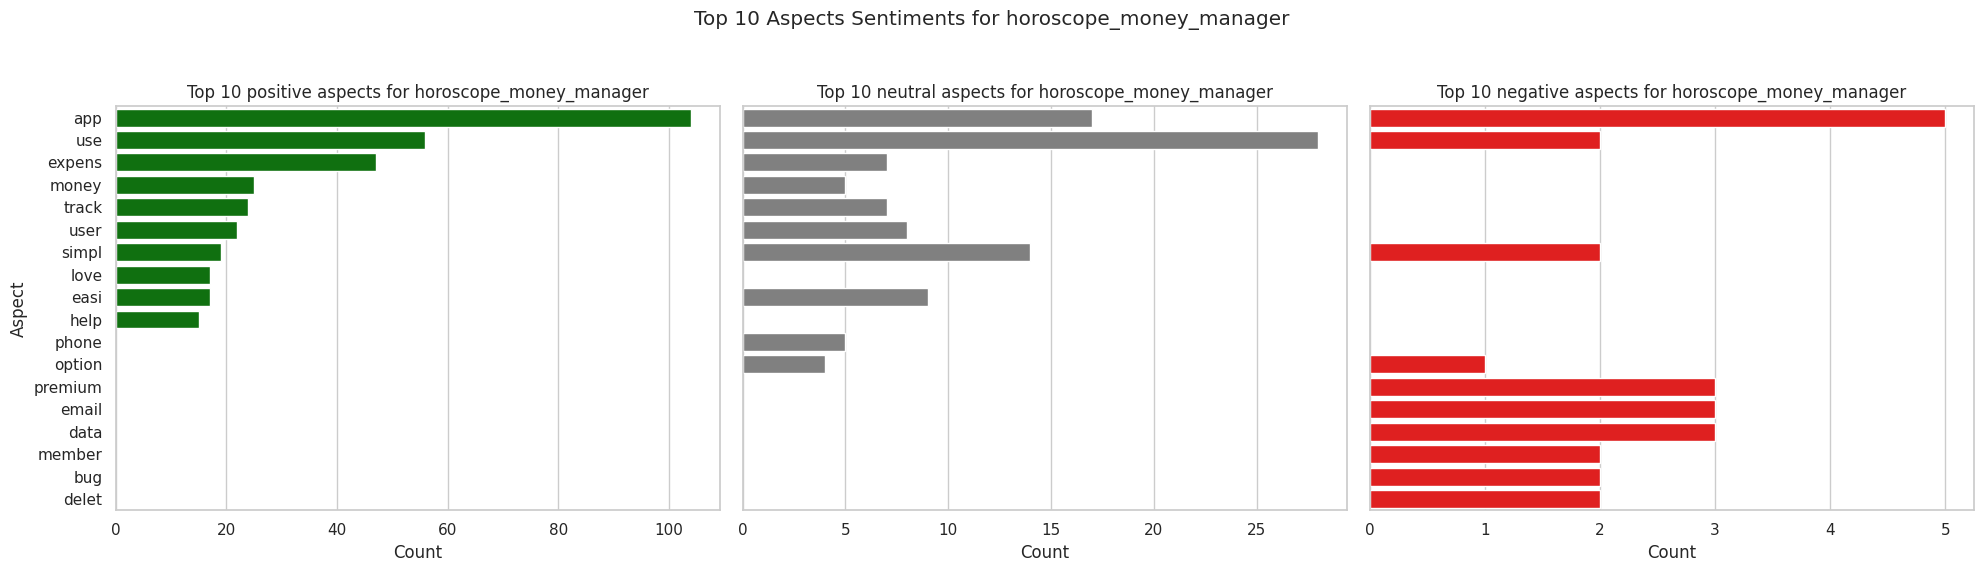

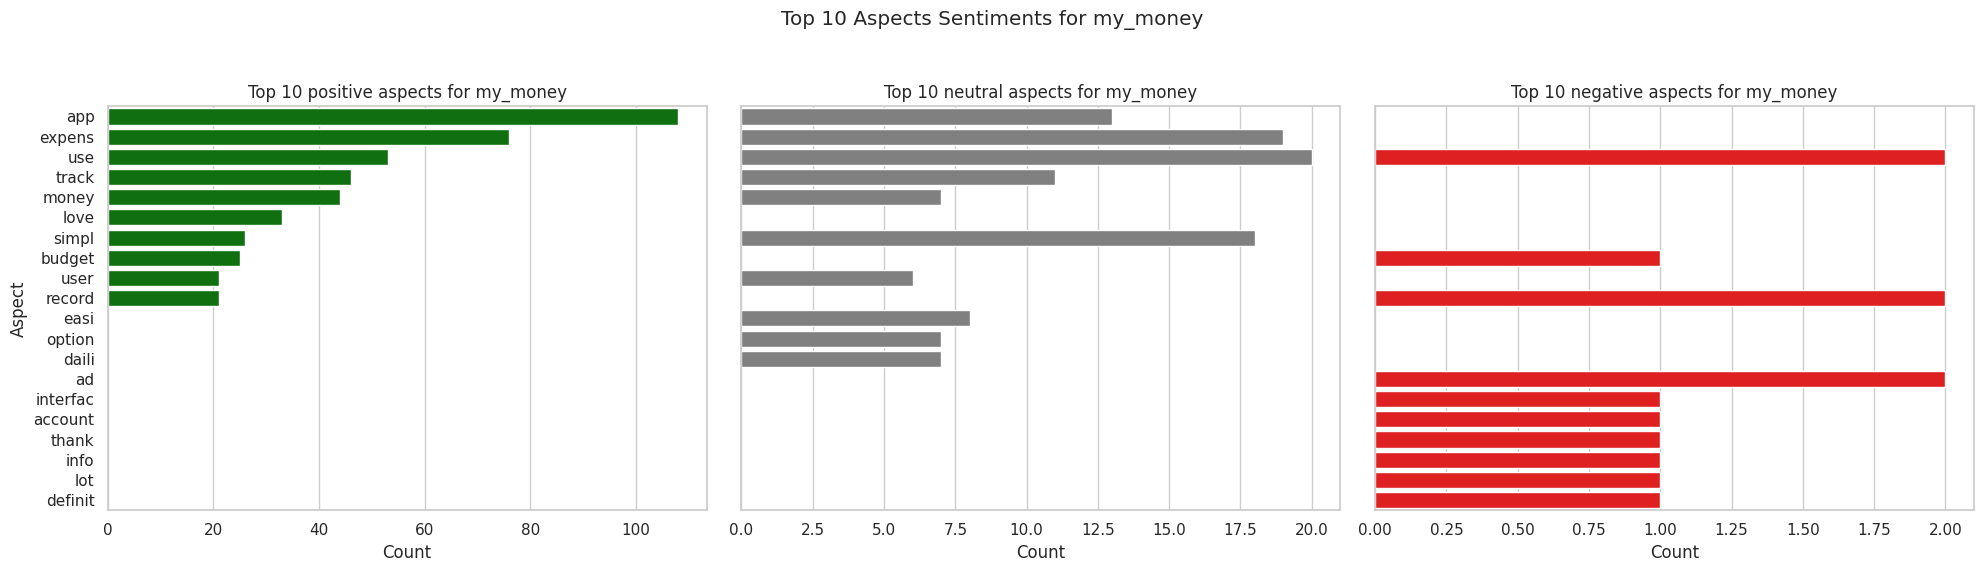

In [69]:
for app_name in sentiment_summary_df['app_name'].unique():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)
    fig.suptitle(f'Top 10 Aspects Sentiments for {app_name}')

    for idx, sentiment in enumerate(['positive', 'neutral', 'negative']):
        plot_top_aspects_for_app(sentiment_summary_df, app_name, sentiment, axes[idx])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
    plt.show()

In [72]:
total_sentiments = sentiment_summary_df.groupby('aspect').sum()

In [73]:
top_positive_aspects = total_sentiments['positive'].sort_values(ascending=False).head(10)
top_neutral_aspects = total_sentiments['neutral'].sort_values(ascending=False).head(10)
top_negative_aspects = total_sentiments['negative'].sort_values(ascending=False).head(10)


In [74]:
top_positive_aspects_df = top_positive_aspects.reset_index()
top_neutral_aspects_df = top_neutral_aspects.reset_index()
top_negative_aspects_df = top_negative_aspects.reset_index()


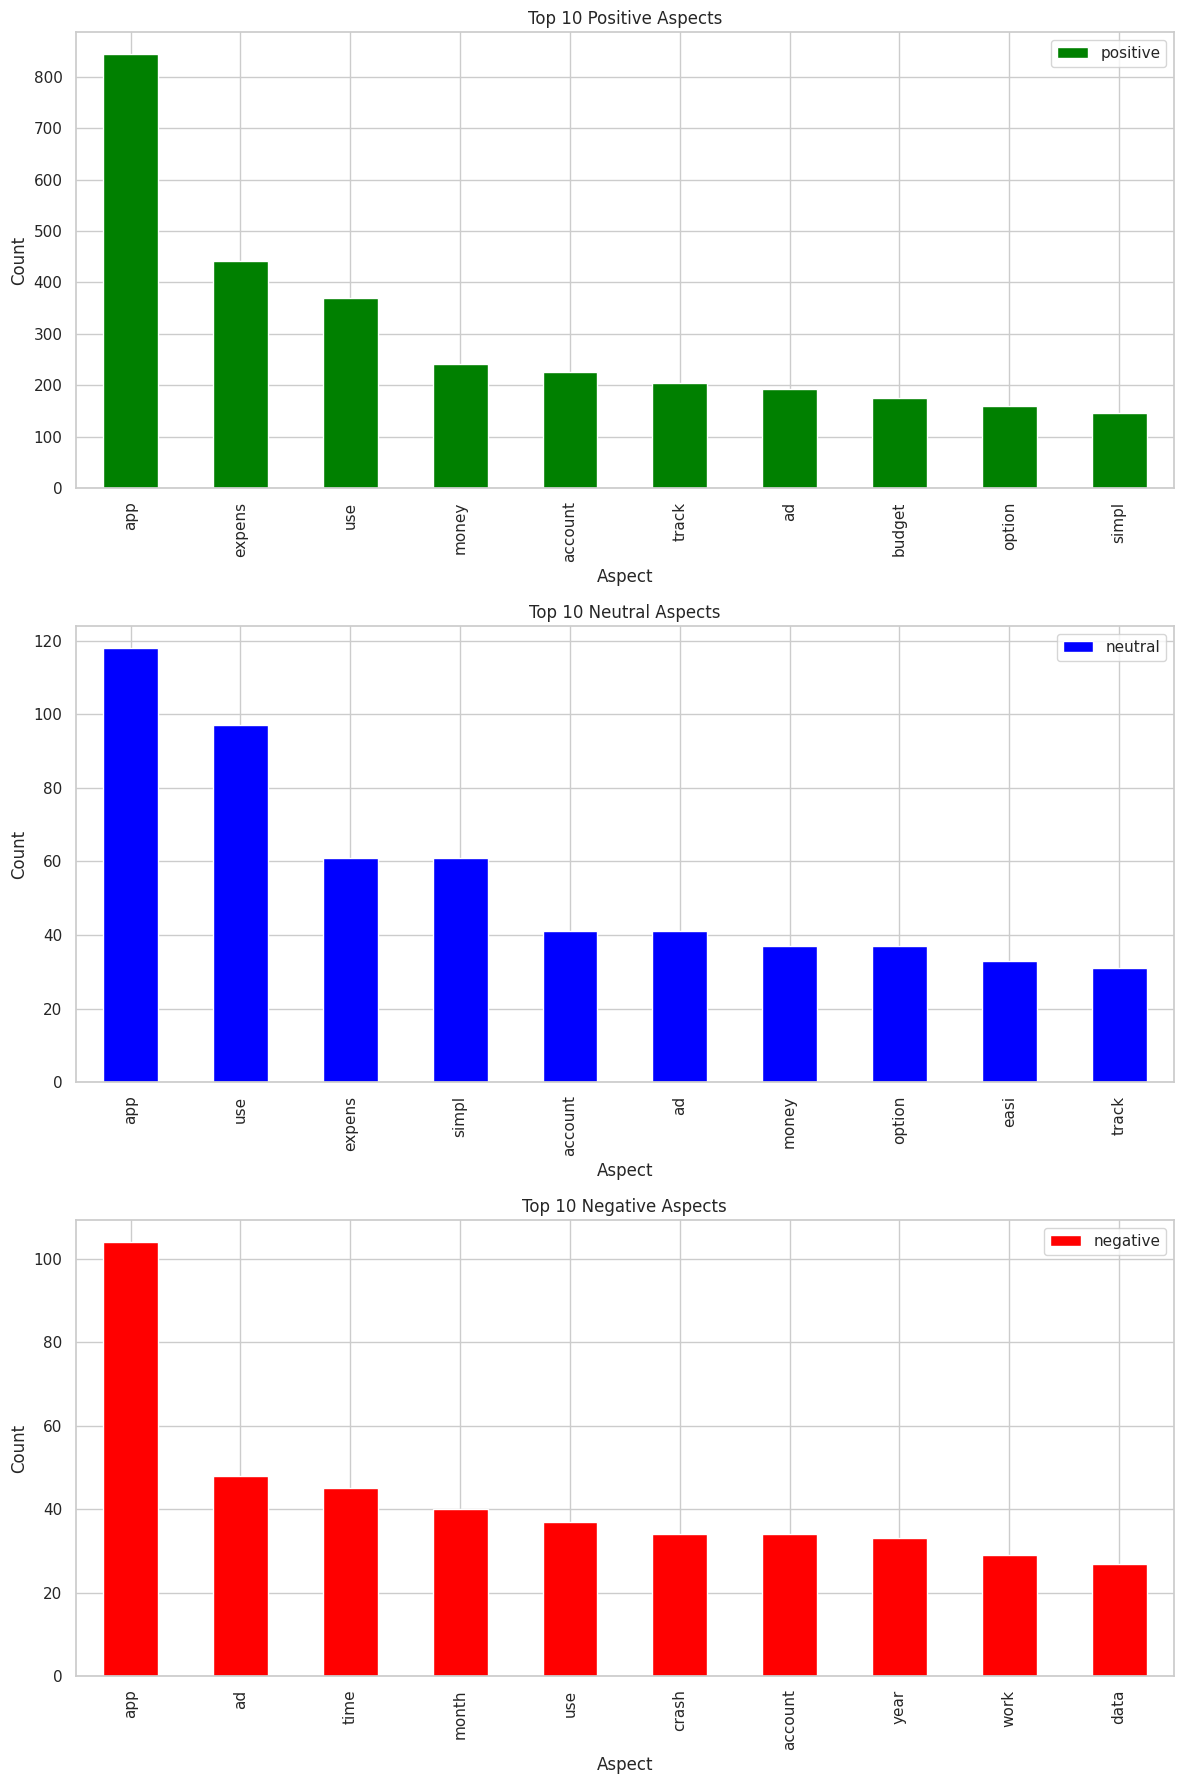

In [79]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot positive sentiments
top_positive_aspects_df.plot(kind='bar', x='aspect', y='positive', ax=axes[0], color='green')
axes[0].set_title('Top 10 Positive Aspects')
axes[0].set_xlabel('Aspect')
axes[0].set_ylabel('Count')

# Plot neutral sentiments
top_neutral_aspects_df.plot(kind='bar', x='aspect', y='neutral', ax=axes[1], color='blue')
axes[1].set_title('Top 10 Neutral Aspects')
axes[1].set_xlabel('Aspect')
axes[1].set_ylabel('Count')

# Plot negative sentiments
top_negative_aspects_df.plot(kind='bar', x='aspect', y='negative', ax=axes[2], color='red')
axes[2].set_title('Top 10 Negative Aspects')
axes[2].set_xlabel('Aspect')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [81]:
combined_negative_neutral = sentiment_summary_df[['aspect', 'negative', 'neutral']].copy()
combined_negative_neutral['non_positive'] = combined_negative_neutral['negative'] + combined_negative_neutral['neutral']
words_negative_neutral = combined_negative_neutral.groupby('aspect')['non_positive'].sum().to_dict()

In [82]:
wordcloud_neg_neu = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(words_negative_neutral)

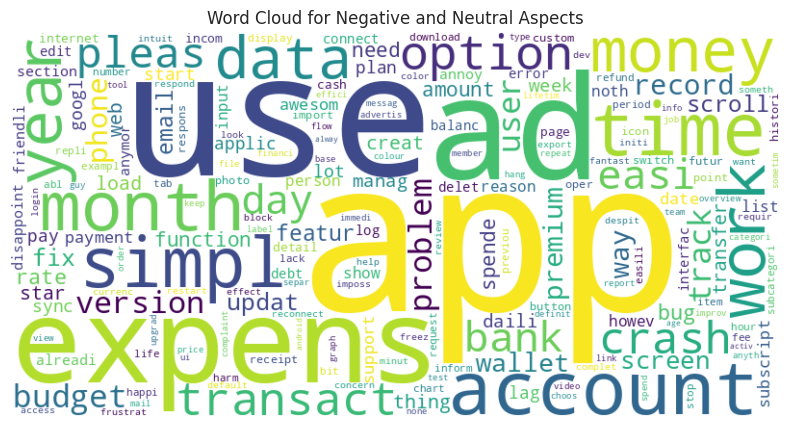

In [83]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg_neu, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative and Neutral Aspects')
plt.show()


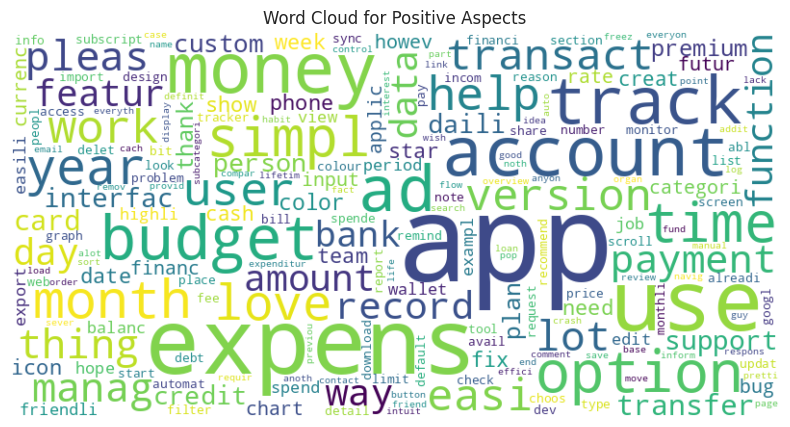

In [84]:
words_positive = sentiment_summary_df.groupby('aspect')['positive'].sum().to_dict()

# Create a word cloud for positive aspects
wordcloud_pos = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(words_positive)

# Plot the word cloud for positive aspects
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Aspects')
plt.show()